In [1]:
import pandas as pd
import joblib
import numpy as np
import torch
import torch.optim as optim
import warnings 
warnings.simplefilter('ignore')
from torch.nn import Linear,ReLU,Sigmoid
from utils import *
torch.cuda.is_available()

True

In [2]:
tag = pd.read_excel('./data/tag盤點表20200323.xlsx')

tag['TAG'] = [str(i).replace('TI','TJ') for i in tag['TAG'].values]

temp = tag[tag['TAG']=='MLPAP_TJC-0757A.PV'].copy()
temp['TAG'] = 'MLPAP_TJ-0757B.PV'
tag = tag.append(temp)

tag_map = dict(zip(tag['TAG'],tag['chinese']))
tag_map

{'MLPAP_TJC-0627.PV': 'OX預熱器出口溫度',
 'MLPAP_TRC-0610.PV': '空氣預熱器出口溫度',
 'MLPAP_FR-0632.PV': '汽機風量',
 'MLPAP_FQ-0619.PV': 'OX入料量',
 'MLPAP_TJC-0757A.PV': '反應槽鹽浴溫度',
 'MLPAP_PIC-0741.PV': '汽鼓(V211)鍋爐水壓力',
 'MLPAP_LIC-0738.PV': '汽鼓(V211)鍋爐水液位',
 'MLPAP_PIC-0761.PV': '鹽浴冷卻器(E112)出口壓力',
 'MLPAP_TRC-0762.PV': '鹽浴冷卻器(E112)入口溫度',
 'MLPAP_LRC-0729.PV': '鍋爐水液位控制',
 'MLPAP_TJC-1721.PV': '轉換式冷凝器冷油溫度',
 'MLPAP_TRC-1734.PV': '轉換式冷凝器熱油溫度',
 'MLPAP_TJR-0721.PV': '反應槽出口溫度',
 'MLPAP_TJ-0706A01': '反應槽觸媒溫度(CL1)_高度(1900)',
 'MLPAP_TJ-0706A02': '反應槽觸媒溫度_高度(1010)',
 'MLPAP_TJ-0706B01': '反應槽觸媒溫度_高度(2865)',
 'MLPAP_TJ-0706C01': '反應槽觸媒溫度_高度(400)',
 'MLPAP_TJ-0706D01': '反應槽觸媒溫度_高度(2230)',
 'MLPAP_TJ-0706E01': '反應槽觸媒溫度(CL1)_高度(1310)',
 'MLPAP_TJ-0716A01': '反應槽觸媒溫度(CL1)_高度(1160)',
 'MLPAP_TJ-0716B01': '反應槽觸媒溫度_高度(700)',
 'MLPAP_TJ-0716C01': '反應槽觸媒溫度_高度(2715)',
 'MLPAP_TJ-0716D01': '反應槽觸媒溫度_高度(1650)',
 'MLPAP_TJ-0716D02': '反應槽觸媒溫度(CL2)_高度(2380)',
 'MLPAP_TJ-0716E01': '反應槽觸媒溫度(CL0)_高度(550)',
 'MLPAP_FQI-0997.PV': '粗P

In [3]:
critic = joblib.load('./model/net.pkl')
critic = critic.eval()
mm_x = joblib.load('./model/mm_x.pkl')
mm_y = joblib.load('./model/mm_y.pkl')

# def columns

In [4]:
x_cols = [
          'MLPAP_FR-0632.PV',
          'MLPAP_LIC-0738.PV',
          'MLPAP_LRC-0729.PV',
          'MLPAP_PIC-0761.PV',
          'MLPAP_TJ-0757B.PV',
          'MLPAP_TJC-0627.PV',
          'MLPAP_TJC-0757.PV',
          'MLPAP_TJC-0757A.PV',
          'MLPAP_TJC-1721.PV',
          'MLPAP_TRC-0610.PV',
          'MLPAP_TRC-0747.PV',
          'MLPAP_TRC-0762.PV',
          'MLPAP_TRC-1734.PV']
x_cols = sorted(x_cols)
x_cols.insert(0,'MLPAP_FQ-0619.PV')
x_cols

['MLPAP_FQ-0619.PV',
 'MLPAP_FR-0632.PV',
 'MLPAP_LIC-0738.PV',
 'MLPAP_LRC-0729.PV',
 'MLPAP_PIC-0761.PV',
 'MLPAP_TJ-0757B.PV',
 'MLPAP_TJC-0627.PV',
 'MLPAP_TJC-0757.PV',
 'MLPAP_TJC-0757A.PV',
 'MLPAP_TJC-1721.PV',
 'MLPAP_TRC-0610.PV',
 'MLPAP_TRC-0747.PV',
 'MLPAP_TRC-0762.PV',
 'MLPAP_TRC-1734.PV']

In [5]:
y_cols = ['MLPAP_FQI-0997.PV']

# critic forward test

In [6]:
x = np.random.normal(loc=0,scale=1,size=(39,14))
x = pd.DataFrame(x,columns=x_cols)
x.head()

,MLPAP_FQ-0619.PV,MLPAP_FR-0632.PV,MLPAP_LIC-0738.PV,MLPAP_LRC-0729.PV,MLPAP_PIC-0761.PV,MLPAP_TJ-0757B.PV,MLPAP_TJC-0627.PV,MLPAP_TJC-0757.PV,MLPAP_TJC-0757A.PV,MLPAP_TJC-1721.PV,MLPAP_TRC-0610.PV,MLPAP_TRC-0747.PV,MLPAP_TRC-0762.PV,MLPAP_TRC-1734.PV
0,-0.117206,-0.696025,-1.199384,-0.916226,0.375019,-0.502030,2.407014,0.212880,-0.287554,0.772184,0.518453,0.619936,-1.426334,0.715160
1,1.518464,-2.247809,1.213488,-0.334482,-0.338486,-0.081547,1.384658,0.179967,0.309368,0.393009,0.297841,0.418374,0.446033,1.125308
2,-0.764337,0.800672,-0.265976,0.749131,-0.678889,-0.448939,0.027809,0.703258,1.073870,-1.340623,-0.465644,-0.669831,-1.311497,-0.256783
3,1.661755,0.149003,-0.164811,0.152623,1.806506,-0.747721,-0.172448,0.174415,1.231851,0.319677,-2.529445,0.435504,0.929895,-0.062495
4,0.840215,-0.340803,-0.363815,0.608662,0.522146,-0.224177,-0.346914,-1.211382,-0.883834,0.651803,0.975486,-0.591156,0.402143,0.451342


In [7]:
y = critic(torch.tensor(x.values.reshape(-1,39*14)).cuda())
print(y)
y = mm_y.inverse_transform(y.detach().cpu().numpy())
y

tensor([[0.7216]], device='cuda:0', dtype=torch.float64,
       grad_fn=<SigmoidBackward>)


array([[8609.35077134]])

# build generator

In [8]:
def build_generator(input_shape,output_shape):
    net = torch.nn.Sequential(
        Linear(input_shape,256),
        ReLU(),
        Linear(256,output_shape),
        Sigmoid()
    )
    return net

In [9]:
def init_weights(m):
  if hasattr(m,'weight'):
    torch.nn.init.xavier_uniform(m.weight)
  if hasattr(m,'bias'):  
    m.bias.data.fill_(0)

In [10]:
net = build_generator(1,39*14).double().cuda()
net.apply(init_weights)
net

Sequential(
  (0): Linear(in_features=1, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=546, bias=True)
  (3): Sigmoid()
)

# noise_iter

In [11]:
noise = torch.tensor(np.random.normal(loc=0,scale=1,size=(5000,1))).cuda()
noise_datasets = torch.utils.data.TensorDataset(noise)
noise_iter = torch.utils.data.DataLoader(noise_datasets,batch_size=128)
noise_iter

# obj function

In [12]:
obj_function = lambda x:critic(x).mean()

# optimizer

In [13]:
optimizer = optim.Adam(net.parameters(),lr=1e-4)

# train

In [14]:
def train(net,noise_iter,obj_function,optimizer,num_epochs=100):
    train_history = []
    for epoch in range(num_epochs):
        train_avg_loss = 0
        t = 0
        for noise in noise_iter:
            noise = noise[0]
            z = net(noise).cuda()
            loss = obj_function(z)
            loss *= -1
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            train_avg_loss += loss.item()
            t += 1
        train_avg_loss /= t
        print("epochs {} loss {:.4f}".format(epoch,train_avg_loss))
        train_history.append(train_avg_loss)
    # plt train loss
    plt.plot(np.array(train_history))
    plt.title('train loss')
    # return trained net
    return net

epochs 0 loss -0.4501
epochs 1 loss -0.5063
epochs 2 loss -0.5772
epochs 3 loss -0.6566
epochs 4 loss -0.7332
epochs 5 loss -0.7989
epochs 6 loss -0.8509
epochs 7 loss -0.8896
epochs 8 loss -0.9174
epochs 9 loss -0.9371
epochs 10 loss -0.9510
epochs 11 loss -0.9610
epochs 12 loss -0.9682
epochs 13 loss -0.9737
epochs 14 loss -0.9778
epochs 15 loss -0.9811
epochs 16 loss -0.9836
epochs 17 loss -0.9857
epochs 18 loss -0.9874
epochs 19 loss -0.9888
epochs 20 loss -0.9899
epochs 21 loss -0.9909
epochs 22 loss -0.9918
epochs 23 loss -0.9925
epochs 24 loss -0.9931
epochs 25 loss -0.9937
epochs 26 loss -0.9941
epochs 27 loss -0.9946
epochs 28 loss -0.9950
epochs 29 loss -0.9953


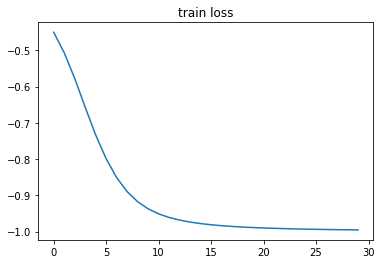

In [15]:
net = train(net,noise_iter,obj_function,optimizer,num_epochs=30)

# result

In [16]:
output = critic(net(noise)).detach().cpu().numpy()
output = mm_y.inverse_transform(output)
output = pd.DataFrame(output,columns=['0997'])
output

,0997
0,9961.060604
1,9992.220955
2,9984.327834
3,9974.022890
4,9960.948872
...,...
4995,9986.939232
4996,9960.968310
4997,9993.685176
4998,9989.316483


In [17]:
best_idx = np.argmax(output.values)
output.loc[[best_idx]]

,0997
4126,9998.590216


In [18]:
result = pd.DataFrame(net(noise).detach().cpu().numpy())
result[:] = mm_x.inverse_transform(result)
r1 = result.iloc[best_idx,:].values.reshape(39,14)
r1 = pd.DataFrame(r1,columns=x_cols)
r1.loc['median'] = r1.median(axis=0)
r1

,MLPAP_FQ-0619.PV,MLPAP_FR-0632.PV,MLPAP_LIC-0738.PV,MLPAP_LRC-0729.PV,MLPAP_PIC-0761.PV,MLPAP_TJ-0757B.PV,MLPAP_TJC-0627.PV,MLPAP_TJC-0757.PV,MLPAP_TJC-0757A.PV,MLPAP_TJC-1721.PV,MLPAP_TRC-0610.PV,MLPAP_TRC-0747.PV,MLPAP_TRC-0762.PV,MLPAP_TRC-1734.PV
0,7819.199509,85.921939,23.966661,31.472254,48.810441,346.477450,143.674472,-2.411681,360.445248,67.146611,190.285523,164.099910,349.992771,161.093688
1,7720.277895,85.985994,23.757363,31.280063,49.679924,361.516461,142.998079,2.633680,360.355829,67.052807,190.337474,163.924623,349.790167,198.878989
2,7781.274094,85.925932,35.105414,31.640492,49.660598,346.415647,143.219987,-2.152579,346.522284,55.636714,190.812120,163.929333,364.095284,198.087723
3,7795.657174,85.577920,53.181243,30.911612,49.680014,361.429735,157.635682,2.749756,346.435260,55.826826,164.430539,179.950888,364.044754,161.864527
4,7792.877019,86.050001,52.437866,57.108409,49.683125,361.527797,157.469542,-2.111534,346.430595,55.628106,191.215332,164.026752,350.026725,161.676013
5,7744.014432,65.430795,53.156709,56.894268,49.698264,361.585152,142.985886,-1.995812,346.589588,55.638799,164.173135,164.177729,364.031424,197.874977
6,7862.364591,86.088983,53.039255,31.326927,48.806636,346.286756,157.201025,2.725299,360.531237,55.561096,164.074586,164.206786,349.891812,198.082694
7,7815.008710,64.957516,35.070769,57.466806,48.820847,361.113027,157.146496,-1.747391,346.821102,55.437198,164.432055,179.747897,364.207483,162.699739
8,7807.511290,65.217475,35.321702,31.430631,48.812304,346.601111,143.076796,-1.670676,346.833945,66.836454,164.475358,179.219615,350.030019,162.816280
9,7781.795125,85.143357,53.136748,56.818780,48.806735,346.277104,143.377028,-1.678050,360.475127,55.579156,191.152406,179.337575,364.494137,198.076102


In [19]:
r1 = r1.loc[['median']].T
r1['chinese'] = r1.index.map(tag_map)
r1 = r1[['chinese','median']]

In [20]:
print('best control factor maybe:')
r1

best control factor maybe:


,chinese,median
MLPAP_FQ-0619.PV,OX入料量,7778.315822
MLPAP_FR-0632.PV,汽機風量,85.413315
MLPAP_LIC-0738.PV,汽鼓(V211)鍋爐水液位,35.519702
MLPAP_LRC-0729.PV,鍋爐水液位控制,55.792739
MLPAP_PIC-0761.PV,鹽浴冷卻器(E112)出口壓力,48.850891
MLPAP_TJ-0757B.PV,反應槽鹽浴溫度,361.400133
MLPAP_TJC-0627.PV,OX預熱器出口溫度,143.674472
MLPAP_TJC-0757.PV,反應器A/B側鹽浴溫度差,-1.640146
MLPAP_TJC-0757A.PV,反應槽鹽浴溫度,346.703229
MLPAP_TJC-1721.PV,轉換式冷凝器冷油溫度,55.699400
